In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from api_keys import api_key



from citipy import citipy


output_data_file = "cities.csv"


lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:

lat_lngs = []
cities = []


lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
  
    if city not in cities:
        cities.append(city)


len(cities)

628

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


record = 1


print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  
    
    
  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        
        
        record= record + 1
        
        
        time.sleep(1.01)
        
  
    except:
        print("City not found. Skipping...")
    continue
 
print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")   


Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 | Punta Arenas
Processing Record 2 | Mukdahan
Processing Record 3 | Calabozo
Processing Record 4 | Brigham City
Processing Record 5 | Nyazepetrovsk
Processing Record 6 | Upernavik
Processing Record 7 | Tadine
Processing Record 8 | Kruisfontein
Processing Record 9 | Aksu
Processing Record 10 | Chokurdakh
Processing Record 11 | Carnarvon
Processing Record 12 | Yellowknife
Processing Record 13 | Geraldton
City not found. Skipping...
Processing Record 14 | Gulf Gate Estates
Processing Record 15 | Souillac
Processing Record 16 | Ribeira Grande
Processing Record 17 | Moree
Processing Record 18 | Saint-Philippe
Processing Record 19 | Ciudad Bolivar
Processing Record 20 | Teguldet
Processing Record 21 | Kapaa
Processing Record 22 | Dolores
Processing Record 23 | Rikitea
Processing Record 24 | Ushuaia
Processing Record 25 | Grindavik
Processing Record 26 | Shipunovo
Processing Record 27 | Ja

Processing Record 226 | Antibes
City not found. Skipping...
Processing Record 227 | Bulungu
Processing Record 228 | Kastamonu
Processing Record 229 | Lucapa
Processing Record 230 | Amapa
Processing Record 231 | Zaranj
Processing Record 232 | Santa Cruz de las Flores
Processing Record 233 | Richmond Hill
Processing Record 234 | Poronaysk
Processing Record 235 | Ostrovnoy
Processing Record 236 | Turbat
Processing Record 237 | Cherskiy
Processing Record 238 | Freeport
Processing Record 239 | Rivers
Processing Record 240 | Rawson
Processing Record 241 | Naze
Processing Record 242 | Vedasandur
Processing Record 243 | Coquimbo
Processing Record 244 | Norman Wells
Processing Record 245 | Siderno
Processing Record 246 | Morondava
Processing Record 247 | Te Anau
Processing Record 248 | Kahului
Processing Record 249 | Tutoia
Processing Record 250 | Hambantota
Processing Record 251 | Kalamaria
Processing Record 252 | Wahpeton
Processing Record 253 | Portland
Processing Record 254 | Saldanha
Proce

City not found. Skipping...
Processing Record 452 | Canyon Lake
Processing Record 453 | Asosa
Processing Record 454 | Lazaro Cardenas
City not found. Skipping...
Processing Record 455 | San Cristobal
Processing Record 456 | Hastings
Processing Record 457 | Victoria
Processing Record 458 | Mecca
Processing Record 459 | Atar
Processing Record 460 | Namatanai
Processing Record 461 | Nacala
Processing Record 462 | Le Moule
Processing Record 463 | Santa Cruz del Sur
Processing Record 464 | Thaton
Processing Record 465 | Kamaishi
Processing Record 466 | Doha
Processing Record 467 | Skjervoy
Processing Record 468 | Sibu
Processing Record 469 | Washington DC.
City not found. Skipping...
Processing Record 470 | Wakkanai
Processing Record 471 | Sar-e Pul
City not found. Skipping...
Processing Record 472 | Pedasi
Processing Record 473 | Tezu
Processing Record 474 | Klyuchi
City not found. Skipping...
Processing Record 475 | Bristol
Processing Record 476 | Yenagoa
Processing Record 477 | Montepuez

In [11]:
weather_col = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


weather_data = pd.DataFrame(weather_col)


weather_data.count()

City          562
Cloudiness    562
Country       562
Date          562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [12]:

weather_data.to_csv('weather_data.csv')

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,90,CL,1562874580,93,-53.16,-70.91,41.00,13.87
1,Mukdahan,100,TH,1562874879,89,16.54,104.73,76.89,6.06
2,Calabozo,23,VE,1562874880,72,8.92,-67.43,84.81,1.19
3,Brigham City,1,US,1562874711,8,41.51,-112.02,96.01,3.36
4,Nyazepetrovsk,84,RU,1562874882,95,56.06,59.60,53.85,2.84


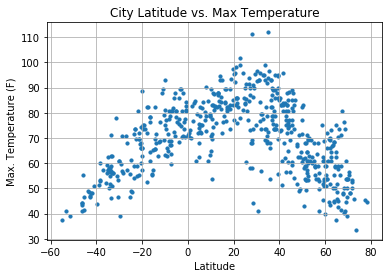

In [13]:

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)


plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Max_Temp_vs_Latitude.png")

plt.show()

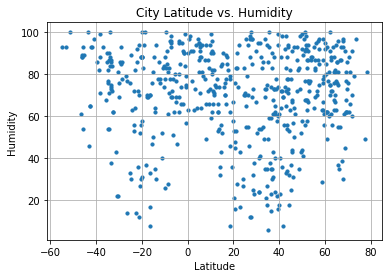

In [14]:

plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Humidity_vs_Latitude.png")


plt.show()

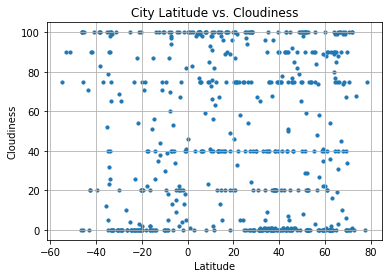

In [15]:

plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)


plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Cloudiness_vs_Latitude.png")


plt.show()

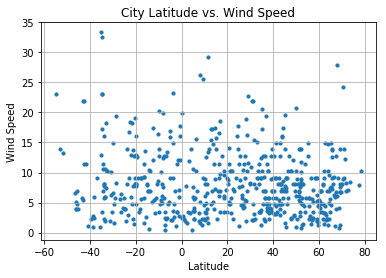

In [16]:

plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)


plt.savefig("Wind Speed_vs_Latitude.png")


plt.show()